Hello!

Saya senang bisa mereview project Anda hari ini.

Ketika Saya melihat error untuk pertama kali, Saya akan menunjukkannya. Saya akan membiarkan Anda menemukan dan memperbaikinya sendiri. Selain itu, dalam keseluruhan notebook, Saya akan mengusulkan beberapa improvisasi yang dapat dilakukan dan juga memberikan komentar terkait persepsi Anda terhadap suatu subject.Tetapi, jika Anda masih tidak dapat menyelesaikan tugas, Saya akan memberikan petunjuk yang lebih presisi di iterasi selanjutnya dan beberapa contoh praktis. Saya terbuka untuk feedbacks dan diskusi terkait topik yang sedang dibahas.

Anda akan menemukan beberapa jenis komentar saya sebagai berikut - **tolong jangan dipindah, diedit atau dihapus**.

Anda akan menemukan komentar saya dengan warna hijau, kuning dan merah sebagai berikut:

<div class="alert alert-block alert-success">
<b>Code reviewer's comment</b> <a class="tocSkip"></a>

Success. Semua dikerjakan dengan benar.
</div>

<div class="alert alert-block alert-warning">
<b>Code reviewer's comment</b> <a class="tocSkip"></a>

Catatan. Beberapa rekomendasi.
</div>

<div class="alert alert-block alert-danger">

<b>Code reviewer's comment</b> <a class="tocSkip"></a>

Butuh perbaikan. Cell ini membutuhkan perbaikan. Pengerjaan proyek tidak dapat diterima dengan komentar berwarna merah.
</div>

Kamu dapat menjawab sebagai berikut:

<div class="alert alert-block alert-info">
<b>Jawaban student.</b> <a class="tocSkip"></a>
</div>

# Rekomendasi Paket Megaline

Operator seluler Megaline merasa tidak puas karena banyak pelanggan mereka yang masih menggunakan paket lama. Perusahaan tersebut ingin mengembangkan sebuah model yang dapat menganalisis perilaku konsumen dan merekomendasikan salah satu dari kedua paket terbaru Megaline: Smart atau Ultra.
Anda memiliki akses terhadap data perilaku para pelanggan yang sudah beralih ke paket terbaru (dari proyek kursus Analisis Data Statistik). Dalam tugas klasifikasi ini, Anda perlu mengembangkan sebuah model yang mampu memilih paket dengan tepat. Mengingat Anda telah menyelesaikan langkah pra-pemrosesan data, Anda bisa langsung menuju ke tahap pembuatan model.
Kembangkanlah sebuah model yang memiliki accuracy setinggi mungkin. Pada proyek ini, ambang batas untuk tingkat accuracy-nya adalah 0,75. Periksalah metrik accuracy model Anda dengan menggunakan test dataset.

# Daftar Konten 

* [Pendahuluan](#Pendahuluan)
    * [Tujuan](#Tujuan)
    * [Tahapan](#Tahapan)
* [Inisialisasi](#Inisialisasi)
* [Memuat Data](#Memuat-Data)
* [Pra Pemrosesan Data](#Pra-Pemrosesan-Data)
* [Membagi Data](#Membagi-Data)
* [Analisis Model](#Cek-Model-Machine-Learning)
    * [Decision Tree](#Decision-Tree)
    * [Random Forest](#Random-Forest)
    * [Logistic Regression](#Logistic-Regression)
    * [Evaluasi Model](#Evaluasi-Model)    
* [Tes Set Model](#Tes-Set-Model)
* [Cek Kewarasan Model](#Cek-Kewarasan-Model)

<div class="alert alert-block alert-success">
<b>Code reviewer's comment</b> <a class="tocSkip"></a>

Success. Konten disusun dengan rapi.
</div>

## Pendahuluan
Dalam proyek ini kita akan melakukan analisis terhadap data klien Megaline yang sudah menggunakan salah satu dari kedua paket terbaru Megaline yaitu Smart atau Ultra. Kita akan mengembangkan sebuah model yang dapat menganalisis perilaku konsumen dan merekomendasikan salah satu dari kedua paket tersebut.

### Tujuan
mengembangkan sebuah model yang memiliki accuracy setinggi mungkin dengan ambang batas untuk tingkat accuracy-nya adalah 0,75.

### Tahapan 
Pertama kita akan memuat data dan mempelajari informasi umum yang ada pada dataset, kita hanya akan melakukan sedikit pra pemrosesan data disini. Jika mengubah data, pastikan data yang diubah tidak termasuk dalam test set.

Kedua kita akan memisahkan data menjadi training, validation, dan test set. Kemudian melakukan analisis dengan beberapa model seperti decision tree, random forest, dan logistic regression. 

Ketiga kita melakukan cek kewarasan terhadap model.

## Inisialisasi
Import library yang akan digunakan.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler

## Memuat Data
Buka dan cermati file data secara teliti. File path: /datasets/users_behavior.csv.

In [2]:
df = pd.read_csv('/datasets/users_behavior.csv')

## Pra Pemrosesan Data
Pada tahap pra pemrosesan data, kita akan mengekplorasi data kemudian memperbaiki dan menambah kualitas data. Mari kita mempelajari gambaran umum tentand data yang kita miliki.

In [3]:
df.head()

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


In [5]:
df.describe()

,calls,minutes,messages,mb_used,is_ultra
count,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000
mean,63.038892,438.208787,38.281269,17207.673836,0.306472
std,33.236368,234.569872,36.148326,7570.968246,0.461100
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,274.575000,9.000000,12491.902500,0.000000
50%,62.000000,430.600000,30.000000,16943.235000,0.000000
75%,82.000000,571.927500,57.000000,21424.700000,1.000000
max,244.000000,1632.060000,224.000000,49745.730000,1.000000


In [6]:
df.isna().sum()

calls       0
minutes     0
messages    0
mb_used     0
is_ultra    0
dtype: int64

In [7]:
df.duplicated().sum()

0

Dataset berisi data klien Megaline berjumlah 3214, dengan kolom calls, minutes, messages, mb_used, dan is_ultra. Jika kita membaginya dapat dikatakan is_ultra adalah target sedangkan kolom lainnya sebagai feature-nya. Target adalah variabel dependent atau variabel yang dapat dipengaruhi sedangkan feature adalah variabel independent yaitu variabel yang tidak dapat dipengaruhi.

<div class="alert alert-block alert-success">
<b>Code reviewer's comment</b> <a class="tocSkip"></a>

Success. Observasi data dilakukan dengan baik.
</div>

## Membagi Data

Karena dataset sudah termasuk test dataset, maka kita akan membaginya menjadi 60% training dataset, 20% validation dataset, dan 20% test dataset.

In [8]:
df_train_val, df_test = train_test_split(df, test_size=0.2, stratify=df['is_ultra'], random_state=12345)

In [9]:
df_train_val.shape

(2571, 5)

In [10]:
df_test.shape

(643, 5)

Karena df_train_val adalah 80% dari total dataset maka pembagian untuk train dan validation adalah 75% dan 25%.

In [11]:
df_train, df_valid = train_test_split(df_train_val,test_size = 0.25, stratify=df_train_val['is_ultra'], random_state=12345)

In [12]:
df_train.shape

(1928, 5)

In [13]:
df_valid.shape

(643, 5)

In [14]:
print(f"train = {100*len(df_train)/len(df):.2f}%")
print(f"val = {100*len(df_valid)/len(df):.2f}%")
print(f"test = {100*len(df_test)/len(df):.2f}%")

train = 59.99%
val = 20.01%
test = 20.01%


<div class="alert alert-block alert-warning">
<b>Code reviewer's comment</b> <a class="tocSkip"></a>

Catatan. Data sudah di pisahkan dengan baik. Di sisi lain, jika kita ingin mendapatkan data split dengan proporsi target yang seimbang, pertimbangkan untuk gunakan parameter `stratify` pada `train_test_split`.
</div>

<div class="alert alert-block alert-info">
<b>Siap kak, saya tambahkan stratify-nya.</b> <a class="tocSkip"></a>
</div>

Disini kita akan menormalisasi data pada kolom calls, minutes, messages, dan mb_used.

In [15]:
scaler = MinMaxScaler()
scaler.fit_transform(df_train[['calls', 'minutes', 'messages', 'mb_used']])

array([[0.11065574, 0.10451822, 0.10267857, 0.45083525],
       [0.30737705, 0.29990932, 0.03125   , 0.42354205],
       [0.19262295, 0.1838903 , 0.54910714, 0.64619586],
       ...,
       [0.1557377 , 0.16895212, 0.07142857, 0.14730719],
       [0.3442623 , 0.38148107, 0.14285714, 0.33750148],
       [0.44262295, 0.5024754 , 0.37053571, 0.30543223]])

In [27]:
df_train

,calls,minutes,messages,mb_used,is_ultra
1659,27.0,170.58,23.0,21798.61,0
2176,75.0,489.47,7.0,20478.94,1
108,47.0,300.12,123.0,31244.61,1
426,36.0,198.96,32.0,21596.86,0
1892,102.0,740.28,19.0,17864.12,0
...,...,...,...,...,...
2298,64.0,475.68,20.0,8540.27,0
397,80.0,547.01,54.0,21265.57,0
1439,38.0,275.74,16.0,7122.54,0
3151,84.0,622.60,32.0,16318.74,0


Kita akan membagi feature(X) dan target(y) yang akan digunakan. Kolom target adalah is_ultra dan kolom feature adalah sisa semua kolom lainnya.

In [16]:
# Assign Target and Features Variables
X = df.drop('is_ultra', axis=1)
y = df['is_ultra']

# Train Sample
X_train = df_train.drop('is_ultra', axis=1)
y_train = df_train['is_ultra']

# Validation Sample
X_valid = df_valid.drop('is_ultra', axis=1)
y_valid = df_valid['is_ultra']

# Test Sample
X_test = df_test.drop('is_ultra', axis=1)
y_test = df_test['is_ultra']

## Analisis Model

Kita akan membuat 3 jenis model dengan decision tree, random forest, dan logistic regression. Pada tahap ini kita hanya akan menggunakan validation set untuk mengecek accuracy prediction-nya.

<div class="alert alert-block alert-warning">
<b>Code reviewer's comment</b> <a class="tocSkip"></a>

Catatan. Agar sejalan antara isi dan dan title headernya, ada baiknya bagian ini dimasukkan ke bagian `5. Membagi Data`.
</div>

<div class="alert alert-block alert-info">
<b>Siap kak sudah dipindahkan.</b> <a class="tocSkip"></a>
</div>

### Decision Tree

Depth 1, Accuracy = 0.7589424572317263
Depth 2, Accuracy = 0.7838258164852255
Depth 3, Accuracy = 0.8040435458786936
Depth 4, Accuracy = 0.8040435458786936
Depth 5, Accuracy = 0.8164852255054432
Depth 6, Accuracy = 0.80248833592535
Depth 7, Accuracy = 0.807153965785381
Depth 8, Accuracy = 0.8055987558320373
Depth 9, Accuracy = 0.8118195956454122
Depth 10, Accuracy = 0.8055987558320373
Depth 11, Accuracy = 0.807153965785381
Depth 12, Accuracy = 0.7853810264385692
Depth 13, Accuracy = 0.7869362363919129
Depth 14, Accuracy = 0.7838258164852255
Depth 15, Accuracy = 0.7791601866251944
Depth 16, Accuracy = 0.76049766718507
Depth 17, Accuracy = 0.7511664074650077
Depth 18, Accuracy = 0.7465007776049767
Depth 19, Accuracy = 0.7511664074650077
Depth 20, Accuracy = 0.7465007776049767
Depth 21, Accuracy = 0.7387247278382582
Depth 22, Accuracy = 0.7418351477449455
Depth 23, Accuracy = 0.7356143079315708
Depth 24, Accuracy = 0.7371695178849145
Depth 25, Accuracy = 0.7542768273716952
Depth 26, Accur

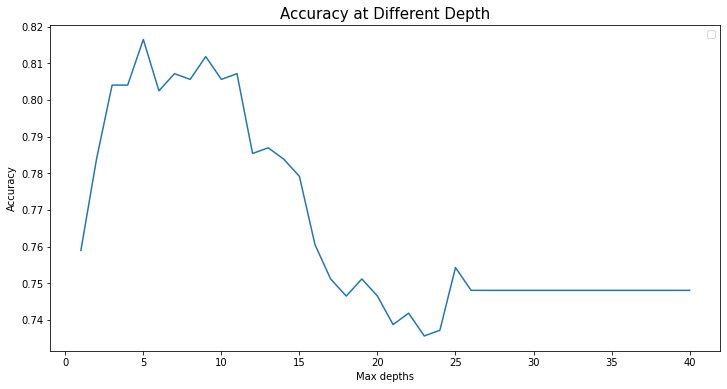

In [17]:
depths = []
model1_accuracy = []

plt.figure(figsize=(12,6))

for depth in range(1,41):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_valid)
    score = accuracy_score(y_valid, y_pred)
    depths.append(depth)
    model1_accuracy.append(score)
    print('Depth', depth, end='')
    print(', Accuracy =', score)
    
sns.lineplot(data=pd.DataFrame(data=model1_accuracy, index=depths))
plt.legend('')
plt.title("Accuracy at Different Depth", fontsize=15) 
plt.ylabel("Accuracy") 
plt.xlabel("Max depths")
plt.show()

Accuracy maksimum dengan decision tree didapatkan pada Depth 5 dengan accuracy = 0.8164852255054432. Pada depth selanjutnya nilai accuracy terus mengalami penurunan.

<div class="alert alert-block alert-success">
<b>Code reviewer's comment</b> <a class="tocSkip"></a>

Success. Pemodelan dengan Decision Tree dilakukan dengan baik. Dapat dilihat bahwa makin dalam tingkat cabang yang dibuat oleh Decision Tree, maka akan meningkatkan error dan menurunkan akurasi.
</div>

### Random Forest

Estimator 10, Accuracy = 0.8133748055987559
Estimator 15, Accuracy = 0.8040435458786936
Estimator 20, Accuracy = 0.8164852255054432
Estimator 25, Accuracy = 0.8133748055987559
Estimator 30, Accuracy = 0.8164852255054432
Estimator 35, Accuracy = 0.807153965785381
Estimator 40, Accuracy = 0.8180404354587869
Estimator 45, Accuracy = 0.8164852255054432
Estimator 50, Accuracy = 0.8164852255054432
Estimator 55, Accuracy = 0.8164852255054432
Estimator 60, Accuracy = 0.8149300155520995
Estimator 65, Accuracy = 0.8149300155520995
Estimator 70, Accuracy = 0.8118195956454122
Estimator 75, Accuracy = 0.8164852255054432
Estimator 80, Accuracy = 0.8133748055987559
Estimator 85, Accuracy = 0.8133748055987559
Estimator 90, Accuracy = 0.8118195956454122
Estimator 95, Accuracy = 0.8149300155520995
Estimator 100, Accuracy = 0.8133748055987559
Estimator 105, Accuracy = 0.8118195956454122
Estimator 110, Accuracy = 0.8149300155520995
Estimator 115, Accuracy = 0.8149300155520995
Estimator 120, Accuracy = 0.8

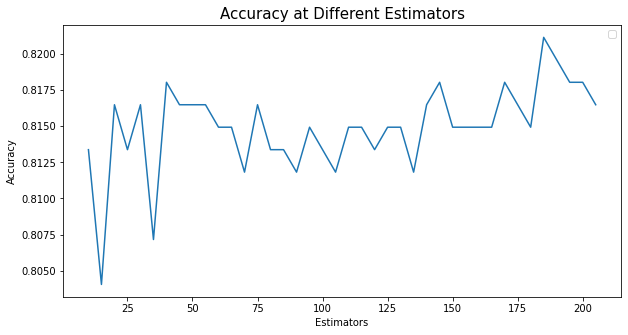

In [18]:
estimators = []
model2_accuracy = []

plt.figure(figsize=(10, 5))

for estim in range(10,206,5):
    model = RandomForestClassifier(random_state=12345, n_estimators=estim)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_valid)
    score = accuracy_score(y_valid, y_pred)
    estimators.append(estim)
    model2_accuracy.append(score)
    print('Estimator', estim, end='')
    print(', Accuracy =', score)
    
sns.lineplot(data=pd.DataFrame(data=model2_accuracy, index=estimators))
plt.legend('')
plt.title("Accuracy at Different Estimators", fontsize=15) 
plt.ylabel("Accuracy") 
plt.xlabel("Estimators")
plt.show()

Pada model random forest nilai tertinggi pada Estimator 185 dengan accuracy = 0.8211508553654744.

<div class="alert alert-block alert-warning">
<b>Code reviewer's comment</b> <a class="tocSkip"></a>

Catatan. Pemodelan RF sudah dilakukan dengan baik. Selain membuat percabangan seperti Decision Tree tetatpi juga membuat tree yang lain yang diwakili oleh parameter n_estimators yang dimana ourputnya akan diagregasi dari semua n_estimators tersebut. Atas dasar it, RF rentan akan overfitting. Salah satu cara untuk menghindarinya ialah dengan menghitung selisih akurasi antara data valid dengan train. Estimators yang memiliki selisih lebih kecil antara data valid dengan data train lebih memiliki potensi untuk tidak overfitting dibanding yang memiliki selisih lebih besar. 
<br>
<br>
Konsep ini juga bisa diterapkan diluar model RF.
</div>

In [19]:
accuracy_diffs = []
nn = []
accuracy_train = []
accuracy_valid = []

for n in range(10,206,5):
    model = RandomForestClassifier(n_estimators=n, random_state=12345)
    model.fit(X_train, y_train)
    train_pred = model.predict(X_train)
    valid_pred = model.predict(X_valid)
    train_acc = accuracy_score(y_train, train_pred)
    valid_acc = accuracy_score(y_valid, valid_pred)
    accuracy_diff = valid_acc - train_acc
    accuracy_diffs.append(accuracy_diff)
    nn.append(n)
    accuracy_train.append(train_acc)
    accuracy_valid.append(valid_acc)
    
for n, diff in enumerate(accuracy_diffs, 1):
    print(f"n_estimators={n}: Accuracy Difference = {diff}")
   


n_estimators=1: Accuracy Difference = -0.165359634235269
n_estimators=2: Accuracy Difference = -0.18506433793873378
n_estimators=3: Accuracy Difference = -0.1752160193078348
n_estimators=4: Accuracy Difference = -0.1835131612062234
n_estimators=5: Accuracy Difference = -0.1793653969011958
n_estimators=6: Accuracy Difference = -0.1907713454179385
n_estimators=7: Accuracy Difference = -0.18144089234204297
n_estimators=8: Accuracy Difference = -0.18247743009621653
n_estimators=9: Accuracy Difference = -0.18299610229538665
n_estimators=10: Accuracy Difference = -0.18351477449455678
n_estimators=11: Accuracy Difference = -0.18506998444790046
n_estimators=12: Accuracy Difference = -0.18506998444790046
n_estimators=13: Accuracy Difference = -0.18818040435458783
n_estimators=14: Accuracy Difference = -0.18351477449455678
n_estimators=15: Accuracy Difference = -0.18662519440124414
n_estimators=16: Accuracy Difference = -0.18662519440124414
n_estimators=17: Accuracy Difference = -0.1881804043545

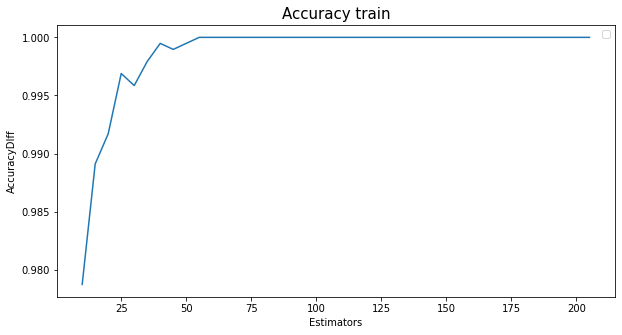

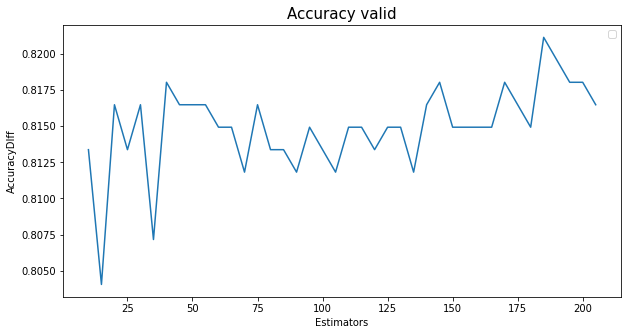

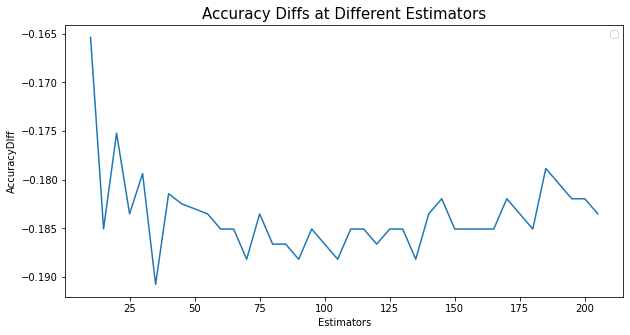

    accuracy_train  accuracy_valid  Accuracy_Diffs
0         0.978734        0.813375       -0.165360
1         0.989108        0.804044       -0.185064
2         0.991701        0.816485       -0.175216
3         0.996888        0.813375       -0.183513
4         0.995851        0.816485       -0.179365
5         0.997925        0.807154       -0.190771
6         0.999481        0.818040       -0.181441
7         0.998963        0.816485       -0.182477
8         0.999481        0.816485       -0.182996
9         1.000000        0.816485       -0.183515
10        1.000000        0.814930       -0.185070
11        1.000000        0.814930       -0.185070
12        1.000000        0.811820       -0.188180
13        1.000000        0.816485       -0.183515
14        1.000000        0.813375       -0.186625
15        1.000000        0.813375       -0.186625
16        1.000000        0.811820       -0.188180
17        1.000000        0.814930       -0.185070
18        1.000000        0.813

In [20]:
plt.figure(figsize=(10, 5))
    
sns.lineplot(data=pd.DataFrame(data=accuracy_train, index=nn))
plt.legend('')
plt.title("Accuracy train", fontsize=15) 
plt.ylabel("AccuracyDIff") 
plt.xlabel("Estimators")
plt.show()

plt.figure(figsize=(10, 5))
    
sns.lineplot(data=pd.DataFrame(data=accuracy_valid, index=nn))
plt.legend('')
plt.title("Accuracy valid", fontsize=15) 
plt.ylabel("AccuracyDIff") 
plt.xlabel("Estimators")
plt.show()

plt.figure(figsize=(10, 5))
    
sns.lineplot(data=pd.DataFrame(data=accuracy_diffs, index=nn))
plt.legend('')
plt.title("Accuracy Diffs at Different Estimators", fontsize=15) 
plt.ylabel("AccuracyDIff") 
plt.xlabel("Estimators")
plt.show()

data = pd.DataFrame(columns=['accuracy_train','accuracy_valid', 'Accuracy_Diffs'])
data['accuracy_train'] = accuracy_train
data['accuracy_valid'] = accuracy_valid
data['Accuracy_Diffs'] = accuracy_diffs
print(data)

Didapatkan accuracy valid set lebih kecil daripada accuracy training set sehingga model dapat dikatakan overfitting dengan accuracy sebagai berikut:

In [21]:
print(f"train estimator={nn[35]}: train accuracy = {accuracy_train[35]}")
print(f"valid estimator={nn[35]}: valid accuracy = {accuracy_valid[35]}")
print(f"n_estimators={nn[35]}: Accuracy Difference = {accuracy_diffs[35]}")

train estimator=185: train accuracy = 1.0
valid estimator=185: valid accuracy = 0.8211508553654744
n_estimators=185: Accuracy Difference = -0.17884914463452561


Pada grafik diatas didapatkan distribusi dari selisih akurasi valid set dan train set terlihat cukup merata dengan selisih terkecil pada n_estimators=1  dengan nilai accuracy difference = -0.165359634235269

### Logistic Regression

Logistic Regression

Iteration 1, Accuracy = 0.6936236391912908
Iteration 6, Accuracy = 0.6920684292379471
Iteration 11, Accuracy = 0.7045101088646968
Iteration 16, Accuracy = 0.7045101088646968
Iteration 21, Accuracy = 0.7045101088646968
Iteration 26, Accuracy = 0.7045101088646968
Iteration 31, Accuracy = 0.7045101088646968
Iteration 36, Accuracy = 0.7045101088646968
Iteration 41, Accuracy = 0.7045101088646968
Iteration 46, Accuracy = 0.7045101088646968
Iteration 51, Accuracy = 0.7045101088646968
Iteration 56, Accuracy = 0.7045101088646968
Iteration 61, Accuracy = 0.7045101088646968
Iteration 66, Accuracy = 0.7045101088646968
Iteration 71, Accuracy = 0.7045101088646968
Iteration 76, Accuracy = 0.7045101088646968
Iteration 81, Accuracy = 0.7045101088646968
Iteration 86, Accuracy = 0.7045101088646968
Iteration 91, Accuracy = 0.7045101088646968
Iteration 96, Accuracy = 0.7045101088646968
Iteration 101, Accuracy = 0.7045101088646968
Iteration 106, Accuracy = 0.7045101088646968


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Iteration 111, Accuracy = 0.7045101088646968
Iteration 116, Accuracy = 0.7045101088646968
Iteration 121, Accuracy = 0.7045101088646968
Iteration 126, Accuracy = 0.7045101088646968
Iteration 131, Accuracy = 0.7045101088646968
Iteration 136, Accuracy = 0.7045101088646968
Iteration 141, Accuracy = 0.7045101088646968
Iteration 146, Accuracy = 0.7045101088646968
Iteration 151, Accuracy = 0.7045101088646968
Iteration 156, Accuracy = 0.7045101088646968
Iteration 161, Accuracy = 0.7045101088646968
Iteration 166, Accuracy = 0.7045101088646968
Iteration 171, Accuracy = 0.7045101088646968
Iteration 176, Accuracy = 0.7045101088646968
Iteration 181, Accuracy = 0.7045101088646968
Iteration 186, Accuracy = 0.7045101088646968
Iteration 191, Accuracy = 0.7045101088646968
Iteration 196, Accuracy = 0.7045101088646968




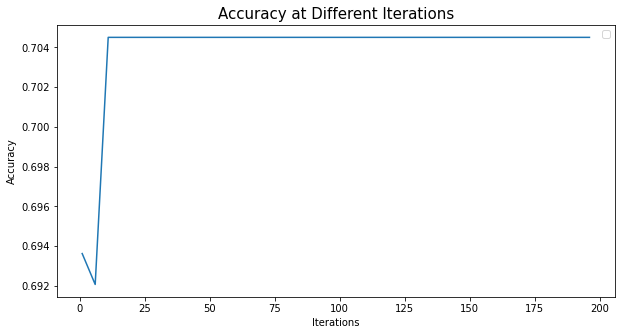

In [22]:
iterations = []
model3_accuracy = []

plt.figure(figsize=(10, 5))
for iteration in range(1,200,5):
    model = LogisticRegression(C=1, max_iter=iteration, solver='liblinear', random_state=12345)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_valid)
    score = accuracy_score(y_valid, y_pred)
    iterations.append(iteration)
    model3_accuracy.append(score)
    print('Iteration', iteration, end='')
    print(', Accuracy =', score)
    
sns.lineplot(data=pd.DataFrame(data=model3_accuracy, index=iterations))
plt.legend('')
    
print('\n')
plt.title("Accuracy at Different Iterations", fontsize=15) 
plt.ylabel("Accuracy") 
plt.xlabel("Iterations")
plt.show()

Pada model logistic regression nilai tertinggi pada Iteration 11 dengan accuracy = 0.7045101088646968.

<div class="alert alert-block alert-warning">
<b>Code reviewer's comment</b> <a class="tocSkip"></a>

Catatan. Logistic linear adalah model yang dibangun ata dasar hubungan linier antar variabel, baik independent ke dependent atau antar variabel independent. Sering kali melakukan scaling (proses membuat rentang nilai menjadi sama) terhadap variabel independent akan meningkatkan performa model.
</div>

<div class="alert alert-block alert-info">
<b>Siap kak, data pada kolom selain is_ultra sudah dinormalisasi.</b> <a class="tocSkip"></a>
</div>

## Evaluasi Model

- Accuracy maksimum dengan decision tree didapatkan pada Depth 5 dengan accuracy = 0.8164852255054432.
- Pada model random forest nilai tertinggi pada Estimator 185 dengan accuracy = 0.8211508553654744.
- Pada model logistic regression nilai tertinggi pada Iteration 11 dengan accuracy = 0.7045101088646968.

Dari ketiga model diatas dengan beberapa kali iterasi pada hyperparameter masing- masing, didapatkan hasil accuracy tertinggi dari model random forest pada estimator 185 dengan accuracy = 0.8211508553654744. Karena itu, kita akan menggunakan random forest pada analisis selanjutnya. Jika menggunakan syarat accuracy 0.75 maka hanya decision tree dan random forest yang memenuhi syarat tersebut. Selanjutnya mari kita cek classification report pada model.

In [23]:
report_valid = classification_report(y_valid, valid_pred, output_dict=True)
display(pd.DataFrame(report_valid))

,0,1,accuracy,macro avg,weighted avg
precision,0.834694,0.758170,0.816485,0.796432,0.811249
recall,0.917040,0.588832,0.816485,0.752936,0.816485
f1-score,0.873932,0.662857,0.816485,0.768394,0.809263
support,446.000000,197.000000,0.816485,643.000000,643.000000


<div class="alert alert-block alert-danger">

<b>Code reviewer's comment</b> <a class="tocSkip"></a>

Butuh perbaikan. Dikarenakan definisi dari sumbu x berbeda (DT max_depth, RF estimator, LR iterasi) sebaiknya grafik diatas tidak ditampilkan. Beberapa cara untuk membandingkan output antara model ialah menggunakan grafik `ROC AUC` atau `precision-recall`. Kedua grafik itu memanfaatkan output berupa probability dan pembagian berdasarkan threshold.
</div>

<div class="alert alert-block alert-info">
<b>Baik kak.</b> <a class="tocSkip"></a>
</div>

<div class="alert alert-block alert-success">
<b>Code reviewer's comment</b> <a class="tocSkip"></a>

Success. Perbandingan antar model dilakukan dengan sesuai.
</div>

## Tes Set Model

Dari hasil evaluasi didapatkan model random forest meiliki nilai accuracy tertinggi, selanjutnya kita akan mengecek model random forest tersebut pada test dataset.

<div class="alert alert-block alert-warning">
<b>Code reviewer's comment</b> <a class="tocSkip"></a>

Catatan. Ada baiknya bagian ini dihapus agar tidak membingungkan, karena training sudah dilakukan pada bagian 7, 8 dan 9.
</div>

<div class="alert alert-block alert-info">
<b>Baik kak.</b> <a class="tocSkip"></a>
</div>

<div class="alert alert-block alert-warning">
<b>Code reviewer's comment</b> <a class="tocSkip"></a>

Catatan. Ada baiknya bagian ini dihapus agar tidak membingungkan, karena training sudah dilakukan pada bagian 7, 8 dan 9.
</div>

<div class="alert alert-block alert-info">
<b>Baik kak.</b> <a class="tocSkip"></a>
</div>

In [24]:
random_forest_model = RandomForestClassifier(random_state=12345, n_estimators=150)
random_forest_model.fit(X_train, y_train)
y_pred = random_forest_model.predict(X_test)
score = accuracy_score(y_test, y_pred)
print('Accuracy =', score)

Accuracy = 0.8164852255054432


Pada test set model random forest hasil yang didapatkan sedikit overfitting sekitar 0.466562986 %, setelah dilakukan normalisasi scaling, dan stratify sampling. Tentunya hasil tersebut masih ada kemungkinan bisa berubah dengan melakukan beberapa tuning ataupun feature engineering pada dataset.

<div class="alert alert-block alert-success">
<b>Code reviewer's comment</b> <a class="tocSkip"></a>

Success. Hasil yang didapat cukup baik.
</div>

## Cek Kewarasan Model

Tentunya ada beberapa cara untuk mengecek kewarasan pada sebuah model, dalam hal ini dataset yang digunakan tidak dilakukan perubahan pada nilai- nilai yang dimiliki. Hasil accuracy dari validation set dan test set underfitting 1.15% sepertinya sudah cukup bagus untuk model sederhana, karena itu kita akan mengecek feature importance pada dataset dengan model random forest.

In [25]:
df.is_ultra.value_counts(normalize=True)

0    0.693528
1    0.306472
Name: is_ultra, dtype: float64

Pengguna paket ultra tercatat hanya sekitar 30% saja. Jika model imbalance dan terus menebak smart maka akan mendapat akurasi sekitar 60% lebih kecil dari akurasi prediksi model sekitar 80%

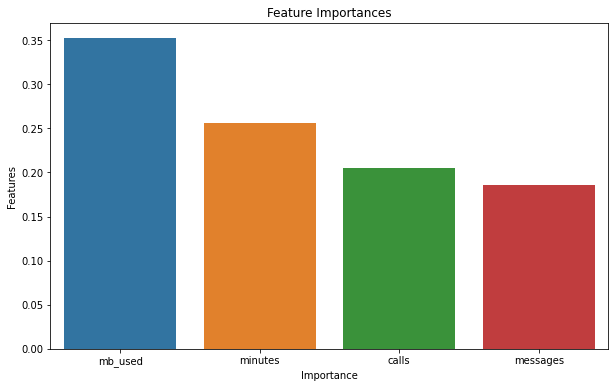

In [26]:
model = RandomForestClassifier(random_state=12345, n_estimators=150)
model.fit(X_train, y_train)
importances = model.feature_importances_
feature_importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})
feature_importances = feature_importances.sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(y='Importance', x='Feature', data=feature_importances)
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importances')
plt.show()

Variable penggunaan internet memiliki tingkat feature importance yang lebih tinggi dibandingkan variabel lainnya. Tentunya masih ada beberapa cara seperti cross validating ataupun menggunakan model dan hyperparameter yang lain untuk meningkatkan akurasi model kita.

<div class="alert alert-block alert-success">
<b>Code reviewer's comment</b> <a class="tocSkip"></a>

Success. Feature importance ditampilkan dengan baik.
</div>